In [ ]:
import numpy as np
from scipy.integrate import solve_ivp
from scipy.optimize import root, fixed_point
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# Load Training Data

filename = "/home/smalani/Cybernetic_BioModel/optogenetic_model_fits/June152023Onwards/trainingData/SGy139_TimeCourse_Jun9_23.xlsx"
df_br1 = pd.read_excel(filename, sheet_name="Bioreactor1")
df_br2 = pd.read_excel(filename, sheet_name="Bioreactor2")

df_br1.head()

In [ ]:
# Visualize Training Data

fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(211)
ax.plot(df_br1["BatchTime"], df_br1["GrowthRate"], linewidth=2, color="blue", label="Bioreactor 1")
ax.set_xlabel("Time (h)")
ax.set_ylabel("Growth Rate (1/h)")
ax2 = ax.twinx()
ax2.plot(df_br1["BatchTime"], df_br1["Phase"], linewidth=2, color="green", label="Bioreactor 1")

ax = fig.add_subplot(212)
ax.plot(df_br2["BatchTime"], df_br2["GrowthRate"], linewidth=2, color="red", label="Bioreactor 2")
ax.set_xlabel("Time (h)")
ax.set_ylabel("Growth Rate (1/h)")
ax2 = ax.twinx()
ax2.plot(df_br2["BatchTime"], df_br2["Phase"], linewidth=2, color="green", label="Bioreactor 2")

In [ ]:
# Truncate and Smooth Data
from scipy.signal import savgol_filter

# Truncate data to remove initial lag phase
time_cutoff = 18
df_br1_trunc = df_br1[df_br1["BatchTime"] > time_cutoff].copy()
df_br2_trunc = df_br2[df_br2["BatchTime"] > time_cutoff].copy()

# Smooth data using Savitzky-Golay filter
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.savgol_filter.html
# Parameters
window_size = 151
poly_order = 3
deriv = 0
df_br1_trunc["GrowthRateSmooth"] = savgol_filter(df_br1_trunc["GrowthRate"], window_size, poly_order, deriv=deriv)
df_br2_trunc["GrowthRateSmooth"] = savgol_filter(df_br2_trunc["GrowthRate"], window_size, poly_order, deriv=deriv)

# Visualize truncated and smoothed data
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(211)
ax.plot(df_br1_trunc["BatchTime"], df_br1_trunc["GrowthRate"], '--', linewidth=2, color="black", label="Bioreactor 1 (Raw)")
ax.plot(df_br1_trunc["BatchTime"], df_br1_trunc["GrowthRateSmooth"], linewidth=1, color="blue", label="Bioreactor 1")
ax.set_xlabel("Time (h)")
ax.set_ylabel("Growth Rate (1/h)")
ax2 = ax.twinx()
ax2.plot(df_br1_trunc["BatchTime"], df_br1_trunc["Phase"], linewidth=2, color="green", label="Bioreactor 1")

ax = fig.add_subplot(212)
ax.plot(df_br2_trunc["BatchTime"], df_br2_trunc["GrowthRate"], '--', linewidth=2, color="black", label="Bioreactor 2 (Raw)")
ax.plot(df_br2_trunc["BatchTime"], df_br2_trunc["GrowthRateSmooth"], linewidth=1, color="red", label="Bioreactor 2")
ax.set_xlabel("Time (h)")
ax.set_ylabel("Growth Rate (1/h)")
ax2 = ax.twinx()
ax2.plot(df_br2_trunc["BatchTime"], df_br2_trunc["Phase"], linewidth=2, color="green", label="Bioreactor 2")

In [ ]:
# Split dataframe by Phase

df_br1_trunc_grouped = df_br1_trunc.groupby("Phase")
df_br2_trunc_grouped = df_br2_trunc.groupby("Phase")

keys = list(df_br1_trunc_grouped.groups.keys())
print(keys)

mu_mean_br1 = []
mu_std_br1 = []
mu_mean_br2 = []
mu_std_br2 = []
mu_mean_overall = []
mu_std_overall = []

rangeme = 20

for key in keys:
    df = df_br1_trunc_grouped.get_group(key)
    mu_mean_br1.append(df["GrowthRateSmooth"].iloc[-rangeme:].mean())
    mu_std_br1.append(df["GrowthRateSmooth"].iloc[-rangeme:].std())
    df = df_br2_trunc_grouped.get_group(key)
    mu_mean_br2.append(df["GrowthRateSmooth"].iloc[-rangeme:].mean())
    mu_std_br2.append(df["GrowthRateSmooth"].iloc[-rangeme:].std())

    mu_mean_overall.append((mu_mean_br1[-1] + mu_mean_br2[-1])/2)
    mu_std_overall.append(np.sqrt(mu_std_br1[-1]**2 + mu_std_br2[-1]**2))
    

print(mu_mean_br1)
print(mu_std_br1)
print(mu_mean_br2)
print(mu_std_br2)

fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(111)
ax.semilogx(keys, mu_mean_br1, linewidth=2, color="blue", label="Bioreactor 1")
ax.semilogx(keys, mu_mean_br2, linewidth=2, color="red", label="Bioreactor 2")
ax.semilogx(keys, mu_mean_overall, linewidth=2, color="black", label="Overall")

In [ ]:
fig = plt.figure(figsize=(3, 2))
ax = fig.add_subplot(111)
ax.semilogx(keys, mu_mean_overall, 'o', linewidth=2, color="blue", label="Bioreactor 1")

fig = plt.figure(figsize=(3, 2))
ax = fig.add_subplot(111)
ax.plot(keys, mu_mean_overall, 'o', linewidth=2, color="blue", label="Bioreactor 1")

In [ ]:
# Load Training Data

filename = "/home/smalani/Cybernetic_BioModel/optogenetic_model_fits/June152023Onwards/trainingData/SGy139_ActDeAct_Mar1_23.xlsx"
df_br1_actdeact = pd.read_excel(filename, sheet_name="Bioreactor1")
df_br2_actdeact = pd.read_excel(filename, sheet_name="Bioreactor2")

df_br1_actdeact.head()

In [ ]:
# Truncate and Smooth Data
from scipy.signal import savgol_filter

# Truncate data to remove initial lag phase
time_cutoff = 18
df_br1_trunc_actdeact = df_br1_actdeact[df_br1_actdeact["BatchTime"] > time_cutoff].copy()
df_br2_trunc_actdeact = df_br2_actdeact[df_br2_actdeact["BatchTime"] > time_cutoff].copy()

# Smooth data using Savitzky-Golay filter
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.savgol_filter.html
# Parameters
window_size = 151
poly_order = 3
deriv = 0
df_br1_trunc_actdeact["GrowthRateSmooth"] = savgol_filter(df_br1_trunc_actdeact["GrowthRate"], window_size, poly_order, deriv=deriv)
df_br2_trunc_actdeact["GrowthRateSmooth"] = savgol_filter(df_br2_trunc_actdeact["GrowthRate"], window_size, poly_order, deriv=deriv)

# Visualize truncated and smoothed data
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(211)
ax.plot(df_br1_trunc_actdeact["BatchTime"], df_br1_trunc_actdeact["GrowthRate"], '--', linewidth=2, color="black", label="Bioreactor 1 (Raw)")
ax.plot(df_br1_trunc_actdeact["BatchTime"], df_br1_trunc_actdeact["GrowthRateSmooth"], linewidth=1, color="blue", label="Bioreactor 1")
ax.set_xlabel("Time (h)")
ax.set_ylabel("Growth Rate (1/h)")
ax2 = ax.twinx()
ax2.plot(df_br1_trunc_actdeact["BatchTime"], df_br1_trunc_actdeact["Phase"], linewidth=2, color="green", label="Bioreactor 1")

ax = fig.add_subplot(212)
ax.plot(df_br2_trunc_actdeact["BatchTime"], df_br2_trunc_actdeact["GrowthRate"], '--', linewidth=2, color="black", label="Bioreactor 2 (Raw)")
ax.plot(df_br2_trunc_actdeact["BatchTime"], df_br2_trunc_actdeact["GrowthRateSmooth"], linewidth=1, color="red", label="Bioreactor 2")
ax.set_xlabel("Time (h)")
ax.set_ylabel("Growth Rate (1/h)")
ax2 = ax.twinx()
ax2.plot(df_br2_trunc_actdeact["BatchTime"], df_br2_trunc_actdeact["Phase"], linewidth=2, color="green", label="Bioreactor 2")

In [ ]:
# Split dataframe by Phase

df_br1_trunc_actdeact_grouped = df_br1_trunc_actdeact.groupby("Phase")
df_br2_trunc_actdeact_grouped = df_br2_trunc_actdeact.groupby("Phase")

keys_br1_actdeact = list(df_br1_trunc_actdeact_grouped.groups.keys())
keys_br2_actdeact = list(df_br2_trunc_actdeact_grouped.groups.keys())

keys_add_br1 = []
keys_add_br2 = []


mu_mean_br1_actdeact = []
mu_std_br1_actdeact = []
mu_mean_br2_actdeact = []
mu_std_br2_actdeact = []

rangeme = 20

for key in keys_br1_actdeact:
    df = df_br1_trunc_actdeact_grouped.get_group(key)
    mu_mean_br1_actdeact.append(df["GrowthRateSmooth"].iloc[-rangeme:].mean())
    mu_std_br1_actdeact.append(df["GrowthRateSmooth"].iloc[-rangeme:].std())
    # df = df_br2_trunc_actdeact_grouped.get_group(key)
    # mu_mean_br2.append(df["GrowthRateSmooth"].iloc[-rangeme:].mean())
    # mu_std_br2.append(df["GrowthRateSmooth"].iloc[-rangeme:].std())

    if '_0%' in key:
        keys_add_br1.append(0)
    elif '_10%' in key:
        keys_add_br1.append(0.1)

for key in keys_br2_actdeact:
    df = df_br2_trunc_actdeact_grouped.get_group(key)
    mu_mean_br2_actdeact.append(df["GrowthRateSmooth"].iloc[-rangeme:].mean())
    mu_std_br2_actdeact.append(df["GrowthRateSmooth"].iloc[-rangeme:].std())
    # df = df_br2_trunc_actdeact_grouped.get_group(key)
    # mu_mean_br2.append(df["GrowthRateSmooth"].iloc[-rangeme:].mean())
    # mu_std_br2.append(df["GrowthRateSmooth"].iloc[-rangeme:].std())

    if '_0%' in key:
        keys_add_br2.append(0)
    elif '_10%' in key:
        keys_add_br2.append(0.1)

    

print(mu_mean_br1)
print(mu_std_br1)
print(mu_mean_br2)
print(mu_std_br2)

fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(111)
ax.plot(keys, mu_mean_br1, 'o', linewidth=2, color="blue", label="Bioreactor 1")
ax.plot(keys, mu_mean_br2, 'o', linewidth=2, color="red", label="Bioreactor 2")
ax.plot(keys_add_br1, mu_mean_br1_actdeact, 'o', linewidth=2, color="blue", label="Bioreactor 1")
ax.plot(keys_add_br2, mu_mean_br2_actdeact, 'o', linewidth=2, color="red", label="Bioreactor 2")

ax.set_xscale('symlog', linthresh=0.01)

In [ ]:
keys_plot = keys + keys_add_br1 + keys_add_br2
mu_plot = mu_mean_br1 + mu_mean_br1_actdeact + mu_mean_br2_actdeact
mu_plot = np.array(mu_plot)
keys_plot = np.array(keys_plot)

mu_plot = mu_plot[np.argsort(keys_plot)]
keys_plot = keys_plot[np.argsort(keys_plot)]

keys_unique = np.unique(keys_plot)
mu_unique = []
mu_std_unique = []

for key in keys_unique:
    mu_unique.append(mu_plot[keys_plot == key].mean())
    mu_std_unique.append(mu_plot[keys_plot == key].std())


fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(111)
ax.plot(keys_unique, mu_unique, 'o', linewidth=2, color="blue", label="Bioreactor 1")
ax.errorbar(keys_unique, mu_unique, yerr=mu_std_unique, fmt='o', linewidth=2, color="blue", label="Bioreactor 1")
ax.set_xscale('symlog', linthresh=0.01)


In [27]:
from scipy.optimize import curve_fit, root

def myODEs(t, x, parameters, pulse):

    kE, kE_basal, nE, KE, kdegE, mu_max, n_mu, K_mu = parameters

    x[x < 0] = 0

    if (x ** n_mu + K_mu ** n_mu) <= 0:
        mu = 0
    else:
        mu = mu_max * (x ** n_mu) / (x ** n_mu + K_mu ** n_mu)
    dxdt = kE_basal + kE * (pulse ** nE) / (pulse ** nE + KE ** nE) - (kdegE + mu) * x
    return np.array(dxdt)

In [28]:
# Interpolate more values for curve fit

keys_unique_interp = np.array([0.   , 0.005, 0.01 , 0.015, 0.02 , 0.03 , 0.05 , 0.08, 0.1  ])
mu_unique_interp = np.interp(keys_unique_interp, keys_unique, mu_unique)

In [29]:
from scipy.optimize import root, fixed_point


# Lambda function for steady state solution
f = lambda x, parameters, pulse: myODEs(0, x, parameters, pulse).flatten()

def pred_ss_fun(parameters, pulse_arr):
    pred_ss = []
    for pulse in pulse_arr:
        x_ss = root(f, 0.5, args=(parameters, pulse)).x
        pred_ss.append(x_ss)
    return np.array(pred_ss)


In [30]:
from scipy.interpolate import interp1d


def generate_predictions_multisetpoint(parameters, time_delay = 3):

    s = df_br1_trunc["Phase"]
    # time_array_fit = [df_br1_trunc["BatchTime"].iloc[0]]
    time_array_fit = []
    time_array_fit = np.append(time_array_fit, df_br1_trunc["BatchTime"][s[s.diff() != 0].index.tolist()])
    time_array_fit = np.append(time_array_fit, df_br1_trunc["BatchTime"].iloc[-1])
    time_array_fit[1:] += time_delay

    # pulse_array_fit = [df_br1_trunc["Phase"].iloc[0]]
    pulse_array_fit = []
    pulse_array_fit = np.append(pulse_array_fit, df_br1_trunc["Phase"][s[s.diff() != 0].index.tolist()])
    # pulse_array_fit = np.append(pulse_array_fit, df_br1_trunc["Phase"].iloc[-1])

    time_array_pred = []
    mu_array_pred = []

    x0 = np.array(pred_ss_fun(parameters, [pulse_array_fit[0]])).flatten()

    _, _, _, _, _, mu_max, n_mu, K_mu = parameters

    for i in range(len(time_array_fit)-1):
        pulse = pulse_array_fit[i]

        tspan = [time_array_fit[i], time_array_fit[i+1]]
        t_eval = np.linspace(tspan[0], tspan[1], 1000)
        
        sol = solve_ivp(myODEs, tspan, x0, method="BDF", t_eval=t_eval, args=(parameters, pulse), rtol=1e-6, atol=1e-9)
        Enz = sol.y[-1,:]
        Enz[Enz<0] = 0
        mu = mu_max * (Enz ** n_mu) / (Enz ** n_mu + K_mu ** n_mu)

        x0 = sol.y[:,-1]

        time_array_pred = np.append(time_array_pred, sol.t)
        mu_array_pred = np.append(mu_array_pred, mu)

    time_array_pred = np.array(time_array_pred)
    mu_array_pred = np.array(mu_array_pred)

    return time_array_pred, mu_array_pred

def generate_predictions_actdeact(parameters, time_delay = 3):
    phase_df = df_br1_trunc_actdeact["Phase"].str.extract('_(.+)%_')[0].astype(float)/100
    s = phase_df
    # time_array_fit = [df_br1_trunc["BatchTime"].iloc[0]]
    time_array_fit_actdeact = []
    time_array_fit_actdeact = np.append(time_array_fit_actdeact, df_br1_trunc_actdeact["BatchTime"][s[s.diff() != 0].index.tolist()])
    time_array_fit_actdeact[1:] += time_delay
    time_array_fit_actdeact = np.append(time_array_fit_actdeact, df_br1_trunc_actdeact["BatchTime"].iloc[-1])

    # pulse_array_fit = [df_br1_trunc["Phase"].iloc[0]]
    pulse_array_fit_actdeact = []
    pulse_array_fit_actdeact = np.append(pulse_array_fit_actdeact, phase_df[s[s.diff() != 0].index.tolist()])

    x0 = np.array(pred_ss_fun(parameters, [pulse_array_fit_actdeact[0]])).flatten()

    time_array_pred = []
    mu_array_pred = []

    _, _, _, _, _, mu_max, n_mu, K_mu = parameters

    for i in range(len(time_array_fit_actdeact)-1):
        pulse = pulse_array_fit_actdeact[i]


        tspan = [time_array_fit_actdeact[i], time_array_fit_actdeact[i+1]]
        t_eval = np.linspace(tspan[0], tspan[1], 1000)
        
        sol = solve_ivp(myODEs, tspan, x0, method="BDF", t_eval=t_eval, args=(parameters, pulse), rtol=1e-6, atol=1e-9)
        Enz = sol.y[-1,:]
        Enz[Enz<0] = 0
        mu = mu_max * (Enz ** n_mu) / (Enz ** n_mu + K_mu ** n_mu)

        x0 = sol.y[:,-1]

        time_array_pred = np.append(time_array_pred, sol.t)
        mu_array_pred = np.append(mu_array_pred, mu)

    time_array_pred = np.array(time_array_pred)
    mu_array_pred = np.array(mu_array_pred)

    return time_array_pred, mu_array_pred

def calculate_error(p, info):
    time_delay = p[0]
    pvar = p[1:]

    error = 0

    if info['Nfeval'] == 9:
        a = 3

    time_array_pred, mu_array_pred = generate_predictions_multisetpoint(pvar, time_delay)

    # interpolate to match time points
    mu_array_pred_interp = np.interp(df_br1_trunc["BatchTime"], time_array_pred, mu_array_pred)
    error_multisetpoint = np.mean((df_br1_trunc["GrowthRateSmooth"].to_numpy().flatten() - mu_array_pred_interp.flatten())**2)

    time_array_pred_actdeact, mu_array_pred_actdeact = generate_predictions_actdeact(pvar, time_delay)

    # interpolate to match time points
    mu_array_pred_interp_actdeact = np.interp(df_br1_trunc_actdeact["BatchTime"], time_array_pred_actdeact, mu_array_pred_actdeact)
    error_actdeact = np.mean((df_br1_trunc_actdeact["GrowthRateSmooth"].to_numpy().flatten() - mu_array_pred_interp_actdeact.flatten())**2)

    pred_Enzymes = pred_ss_fun(pvar, keys_unique_interp)
    _, _, _, _, _, mu_max, n_mu, K_mu = pvar
    mu_ss = mu_max * (pred_Enzymes ** n_mu) / (pred_Enzymes ** n_mu + K_mu ** n_mu)
    
    error_ss = np.mean((mu_ss.flatten() - mu_unique_interp.flatten())**2)

    error = error_multisetpoint * 5 + error_actdeact + error_ss * 5
    # error = np.log10(error_multisetpoint) + np.log10(error_actdeact) + np.log10(error_ss)
    # print(error_multisetpoint, error_actdeact, error_ss, error)

    if error < info['error_best']:
        info['error_best'] = error
        info['pars_best'] = p

    if info['Nfeval']%1000 == 0:
        print('Nfeval: ', info['Nfeval'], 'error_best: ', info['error_best'], 'pars_best: ', info['pars_best'], 'error: ', error, 'pars: ', p)
    info['Nfeval'] += 1

    return error


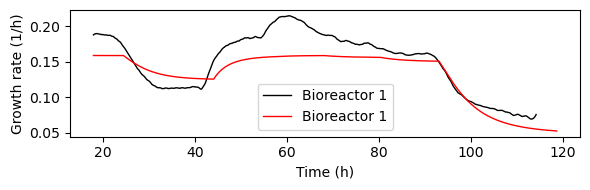

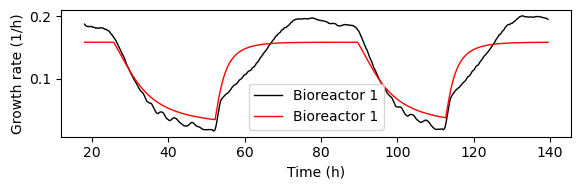

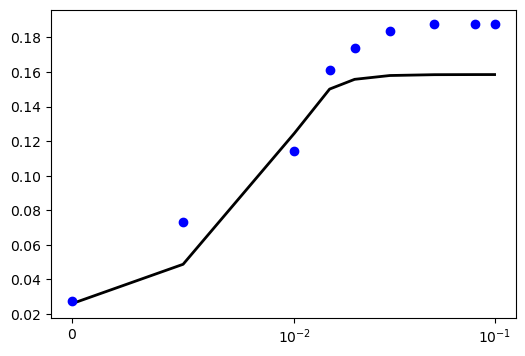

In [31]:
# Initial Guess
kE_basal = 0.001
kE = 0.03
KE = 0.01
nE = 4
kdegE = 0.00

mu_max = 0.2
n_mu = 2
K_mu = 0.1

time_delay = 3

parameters = [kE, kE_basal, nE, KE, kdegE, mu_max, n_mu, K_mu]

par_optimal = parameters
time_delay = 4.49479645e+00
# par_optimal = np.array([2.35607167e-02, 3.98973266e-03, 3.82344870e+00,
#  9.43625339e-03, 1.36748631e-01, 9.99852178e-01, 2.00601321e+00,
#  1.66718806e+00])

time_array_pred, mu_array_pred = generate_predictions_multisetpoint(par_optimal, time_delay)

fig = plt.figure(figsize=(6, 2))
ax = fig.add_subplot(111)
ax.plot(df_br1_trunc["BatchTime"].to_numpy(), df_br1_trunc["GrowthRateSmooth"], linewidth=1, color="black", label="Bioreactor 1")
ax.plot(time_array_pred, mu_array_pred, linewidth=1, color="red", label="Bioreactor 1")
ax.set_xlabel("Time (h)")
ax.set_ylabel("Growth rate (1/h)")
ax.legend()
plt.tight_layout()

time_array_pred, mu_array_pred = generate_predictions_actdeact(par_optimal, time_delay)

fig = plt.figure(figsize=(6, 2))
ax = fig.add_subplot(111)
ax.plot(df_br1_trunc_actdeact["BatchTime"].to_numpy(), df_br1_trunc_actdeact["GrowthRateSmooth"], linewidth=1, color="black", label="Bioreactor 1")
ax.plot(time_array_pred, mu_array_pred, linewidth=1, color="red", label="Bioreactor 1")
ax.set_xlabel("Time (h)")
ax.set_ylabel("Growth rate (1/h)")
ax.legend()
plt.tight_layout()

pred_ss = pred_ss_fun(par_optimal, keys_unique_interp)
_, _, _, _, _, mu_max, n_mu, K_mu = parameters
mu_ss = mu_max * (pred_ss ** n_mu) / (pred_ss ** n_mu + K_mu ** n_mu)

fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(111)
ax.plot(keys_unique_interp, mu_ss, '-', linewidth=2, color="black", label="Model")
ax.plot(keys_unique_interp, mu_unique_interp, 'o', linewidth=2, color="blue", label="Data")
ax.set_xscale('symlog', linthresh=0.01)

In [32]:
from scipy.optimize import basinhopping, differential_evolution, dual_annealing

kE_basal = 0.001
kE = 0.03
KE = 0.01
nE = 4
kdegE = 0.00

mu_max = 0.2
n_mu = 2
K_mu = 0.1

time_delay = 3

parameters = [time_delay, kE, kE_basal, nE, KE, kdegE, mu_max, n_mu, K_mu]

# parameters = [time_delay, kE, kE_basal, nE, KE, kdegE, mu_max, n_mu, K_mu]
# parameters = info["pars_best"]
parameters = np.array([3.57550874e+00, 4.79603886e-02, 1.66077920e-03, 2.44706924e+00,
 1.05049799e-02, 0.00000000e+00, 4.23780618e+00, 1.45811641e+00,
 2.13384154e+00])

bounds = [(0,10), (1e-5, 10), (0, 10), (1e-5, 10), (1e-5, 10), (0, 10), (1e-5, 100), (1e-5, 100), (1e-5, 10)]

info = {'Nfeval':0, 'error_best': 1e10, 'pars_best': np.nan}


class MyTakeStep(object):
    def __init__(self, stepsize=0.05):
        self.stepsize = stepsize

    def __call__(self, x):
        print('Stepping')
        s = self.stepsize
        x *= (1 + np.random.uniform(-s, s, x.shape))
        return x
    
# res = basinhopping(calculate_error, parameters, niter=10000, T=1, minimizer_kwargs={"method":"L-BFGS-B", "bounds":bounds, "args":(info,), "options":({"maxiter": 100})}, take_step=MyTakeStep(stepsize=0.1))


res = basinhopping(calculate_error, parameters, niter=1000, T=1, minimizer_kwargs={"method":"L-BFGS-B", "bounds":bounds, "args":(info,)})


# res = differential_evolution(calculate_error, bounds, args=(info,), maxiter=1000, popsize=20, mutation=(0.5, 1), recombination=0.7, strategy='best1bin', tol=0.01, disp=True, polish=True, init='latinhypercube', atol=1e-6)
# res = dual_annealing(calculate_error, bounds, args=(info,), maxiter=10000, minimizer_kwargs={'method':'L-BFGS-B', 'bounds':bounds}, x0=parameters, initial_temp=5230, restart_temp_ratio=2e-5, visit=2.62, accept=-5.0, maxfun=10000)

Nfeval:  0 error_best:  0.001661649521714001 pars_best:  [3.57550874e+00 4.79603886e-02 1.66077920e-03 2.44706924e+00
 1.05049799e-02 0.00000000e+00 4.23780618e+00 1.45811641e+00
 2.13384154e+00] error:  0.001661649521714001 pars:  [3.57550874e+00 4.79603886e-02 1.66077920e-03 2.44706924e+00
 1.05049799e-02 0.00000000e+00 4.23780618e+00 1.45811641e+00
 2.13384154e+00]
Nfeval:  1000 error_best:  0.0014703578661912863 pars_best:  [3.90942750e+00 2.31655912e-02 3.94303850e-04 2.39200115e+00
 1.14492849e-02 1.82382372e-05 4.23444740e+00 1.07114538e+00
 2.13443046e+00] error:  0.25791602492776267 pars:  [ 4.35930109  2.21911869  1.09950943  0.93014022  2.91675322 10.
  2.52503616 21.95699054  9.21020067]
Nfeval:  2000 error_best:  0.0014703578661912863 pars_best:  [3.90942750e+00 2.31655912e-02 3.94303850e-04 2.39200115e+00
 1.14492849e-02 1.82382372e-05 4.23444740e+00 1.07114538e+00
 2.13443046e+00] error:  0.25791602492776267 pars:  [ 9.64388153  1.96036047  0.85824266  0.62530405  4.0158

KeyboardInterrupt: 

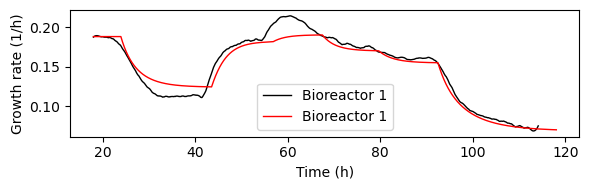

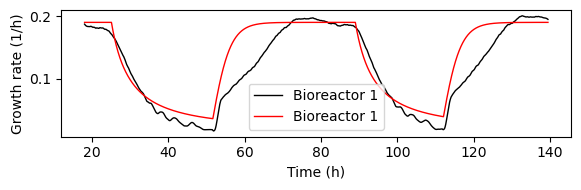

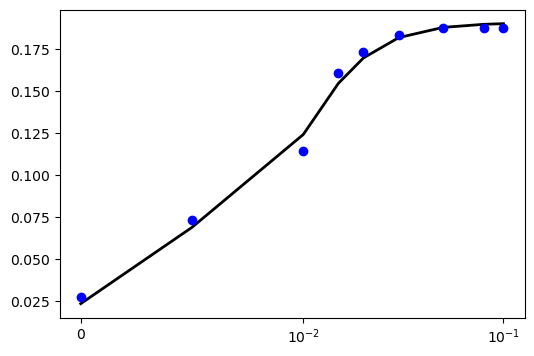

In [36]:
# parameters = [time_delay, kE, kE_basal, nE, KE, kdegE, mu_max, n_mu, K_mu]
parameters = np.array([3.90942750e+00, 2.31655912e-02, 3.94303850e-04, 2.39200115e+00,
       1.14492849e-02, 1.82382372e-05, 4.23444740e+00, 1.07114538e+00,
       2.13443046e+00])

# parameters_to_use = info["pars_best"]
# print(info)
parameters_to_use = parameters

par_optimal = parameters_to_use[1:]
time_delay_optimal = parameters_to_use[0]

# print('best par error: ', calculate_error(info["pars_best"], info))
# print('best par error: ', calculate_error([time_delay, kE, kE_basal, nE, KE, kdegE, mu_max, n_mu, K_mu], info))

time_array_pred, mu_array_pred = generate_predictions_multisetpoint(par_optimal, time_delay_optimal)

fig = plt.figure(figsize=(6, 2))
ax = fig.add_subplot(111)
ax.plot(df_br1_trunc["BatchTime"].to_numpy(), df_br1_trunc["GrowthRateSmooth"], linewidth=1, color="black", label="Bioreactor 1")
ax.plot(time_array_pred, mu_array_pred, linewidth=1, color="red", label="Bioreactor 1")
ax.set_xlabel("Time (h)")
ax.set_ylabel("Growth rate (1/h)")
ax.legend()
plt.tight_layout()

time_array_pred, mu_array_pred = generate_predictions_actdeact(par_optimal, time_delay_optimal)

fig = plt.figure(figsize=(6, 2))
ax = fig.add_subplot(111)
ax.plot(df_br1_trunc_actdeact["BatchTime"].to_numpy(), df_br1_trunc_actdeact["GrowthRateSmooth"], linewidth=1, color="black", label="Bioreactor 1")
ax.plot(time_array_pred, mu_array_pred, linewidth=1, color="red", label="Bioreactor 1")
ax.set_xlabel("Time (h)")
ax.set_ylabel("Growth rate (1/h)")
ax.legend()
plt.tight_layout()

pred_ss = pred_ss_fun(par_optimal, keys_unique_interp)
_, _, _, _, _, mu_max, n_mu, K_mu = par_optimal
mu_ss = mu_max * (pred_ss ** n_mu) / (pred_ss ** n_mu + K_mu ** n_mu)

fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(111)
ax.plot(keys_unique_interp, mu_ss, '-', linewidth=2, color="black", label="Model")
ax.plot(keys_unique_interp, mu_unique_interp, 'o', linewidth=2, color="blue", label="Data")
ax.set_xscale('symlog', linthresh=0.01)

In [39]:
from numpy import interp

df_pid = pd.read_excel("/home/smalani/Cybernetic_BioModel/optogenetic_model_fits/June152023Onwards/trainingData/SGy139_PID_Feb17_23.xlsx")
print(df_pid.head())

time_delay = time_delay_optimal

time_arr = df_pid["time"].to_numpy()
mu_arr = df_pid["mu"].to_numpy()
pulse_arr = df_pid["u"].to_numpy()
pulse_arr_func = interp(time_arr-time_delay, time_arr, pulse_arr)

   time        mu       u
0   0.0  0.182910  0.1000
1   0.0  0.182910  0.0159
2   0.5  0.191892  0.0086
3   1.0  0.191750  0.0078
4   1.5  0.182703  0.0120


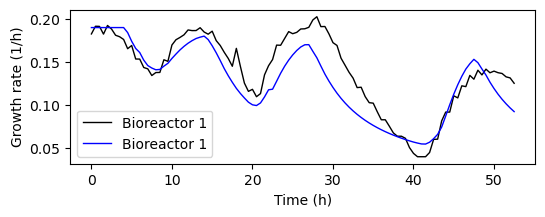

In [42]:
init_cond = pred_ss_fun(par_optimal, [pulse_arr[0]]).flatten()
mu_arr_pred = np.zeros(len(pulse_arr))

_, _, _, _, _, mu_max, n_mu, K_mu = par_optimal
mu_arr_pred[0] = mu_max * init_cond ** n_mu / (init_cond ** n_mu + K_mu ** n_mu)

for i in range(1, len(pulse_arr)):
    tspan = [time_arr[i-1], time_arr[i]]
    pulse = interp(tspan[0]-time_delay, time_arr, pulse_arr)
    sol = solve_ivp(myODEs, tspan, init_cond, method="BDF", args=(par_optimal, pulse), rtol=1e-3, atol=1e-6)
    init_cond = sol.y[:,-1]
    mu_arr_pred[i] = mu_max * init_cond ** n_mu / (init_cond ** n_mu + K_mu ** n_mu)

fig = plt.figure(figsize=(6, 2))
ax = fig.add_subplot(111)
ax.plot(time_arr, mu_arr, linewidth=1, color="black", label="Bioreactor 1")
ax.plot(time_arr, mu_arr_pred, linewidth=1, color="blue", label="Bioreactor 1")
ax.set_xlabel("Time (h)")
ax.set_ylabel("Growth rate (1/h)")
ax.legend()

In [43]:
init_cond

array([0.06116024])